In [426]:
library("TSP")
library("hash")
library("sets")

dataTSP <- read_TSPLIB("/home/LC/mailo01/TSP-ML-Approach/src/R/CLUSTER_DIV/main.tsp")


pointSet <- hash()
noPts <- length(dataTSP)/2
for (i in 1:noPts){
    pointSet[[toString(i)]] <- tuple(dataTSP[i], dataTSP[i+noPts])
}

dist_pts <- function(pt1,pt2){
        return(sqrt((pt1[[1]]-pt2[[1]])^2 + (pt1[[2]]-pt2[[2]])^2))
}


In [434]:
radius <-1

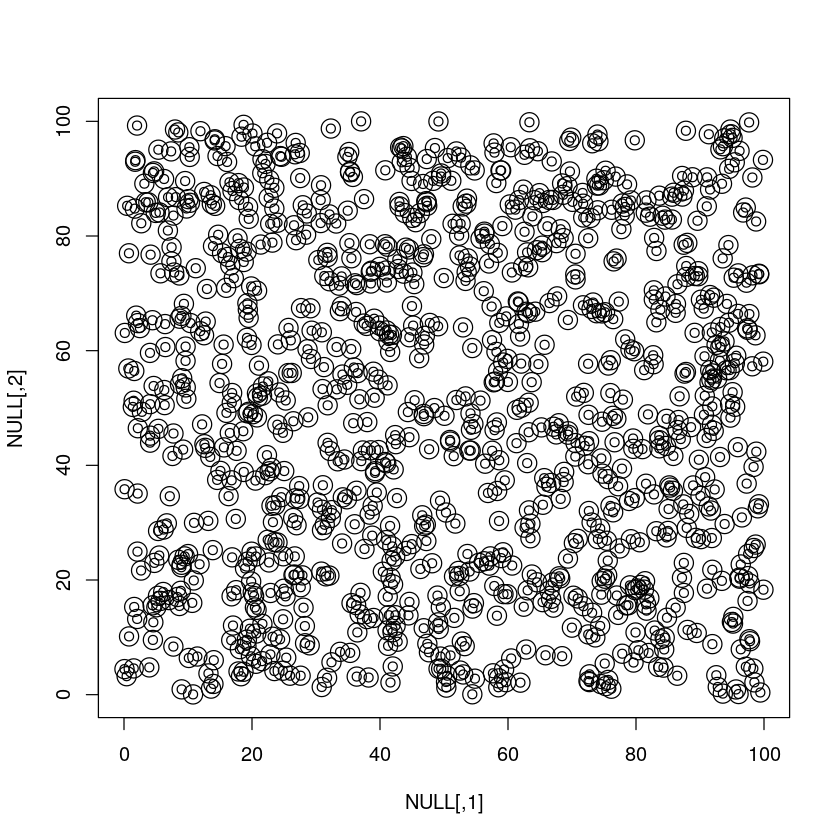

In [438]:
radius <-1.5
plot(dataTSP,xlim=c(0,100), ylim=c(0,100))
symbols(dataTSP,circles=rep(radius,noPts), add=T, inches=F)

In [439]:

current_tree <- list()
checklist <-(c(1:noPts))
while (length(checklist) != 0){

    branch <- list()
    
    old_branch_len<- length(branch)
    
    print("initial branch length")
    print(old_branch_len)

    startPt = checklist[1]
    branch<-append(branch, startPt)

    print("initial branch length")
    print(old_branch_len)
    print("current branch length")
    print(length(branch))

    counter =1

    while(old_branch_len != length(branch)){
        print("iteration")
        print(counter)

        current_branch_len <- length(branch)
        print("old branch length")
        print(old_branch_len)
        print("current_branch_len is: ")
        print(current_branch_len)
        print("current pts on branch to connect: ")
        pts_to_connect <- c(branch[old_branch_len+1:current_branch_len])

        print("points to continue carrying out comparisons")
        print(pts_to_connect)

        checklist <-checklist[!checklist %in% pts_to_connect]

        print("remove pts to connect from checklist. Current state of checklist")
        print(checklist)

        print("updating the number of vertices in branch. Length:")

        old_branch_len= current_branch_len

        print(old_branch_len)

        print("attempt to connect all points in branch to different points")

        for (connect_pt in pts_to_connect){
            print("enter loop lvl 1. Gather pivot point to connect")
            print(connect_pt)
            print(values(pointSet,keys=connect_pt))

            for (comparePt in checklist){
                print("enter loop lvl 2. Gather compare point to connect")
                print(comparePt)
                print(values(pointSet,keys=comparePt))

                if (!comparePt %in%branch){
                    vPt1 <-values(pointSet, keys=connect_pt) 
                    vPt2 <-values(pointSet, keys=comparePt) 

                    print("distance between connect and compare points")
                    print(dist_pts(vPt1,vPt2))

                    if (dist_pts(vPt1,vPt2) <= 2*radius){
                        print("compare point within range of pivot point. Added to branch")

                        branch<-append(branch,comparePt)
                        
                        print("current state of branch")
                        print(branch)
                        
                        checklist <-checklist[!checklist %in% c(comparePt)]
                        print("removed already connected points")
                        print("current state of checklist")
                        print(checklist)
                        
                    } else {print("point out of range")}
                } else{
                    print("point already in branch. Move on")
                    print("current state of branch")
                    print(branch)}
            }
        }
        counter <- counter +1
        
    }
    print("append branch to tree")
    current_tree <- append(current_tree, list(branch))
}


In [ ]:
current_tree

In [ ]:

plot(dataTSP,xlim=c(0,100), ylim=c(0,100))
symbols(dataTSP,circles=rep(radius,noPts), add=T, inches=F)


for (num in branch){
    pt <- values(pointSet, keys =num)
    points(pt[1],pt[2], col='2')
}




In [ ]:
dataTSP
points